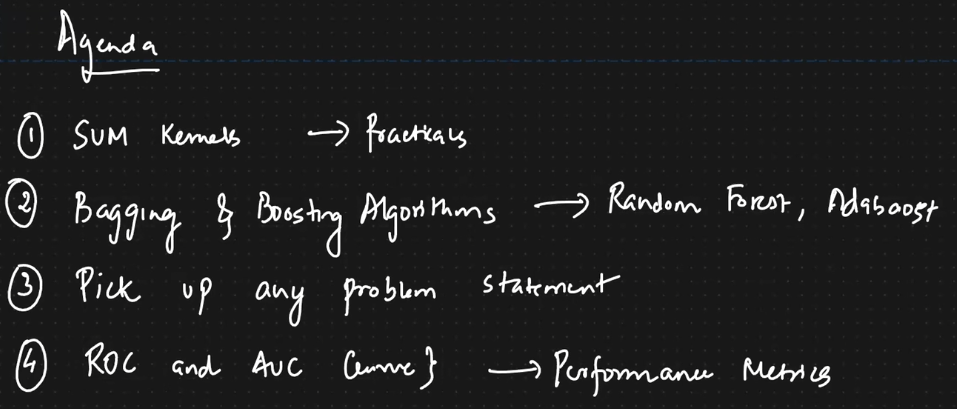

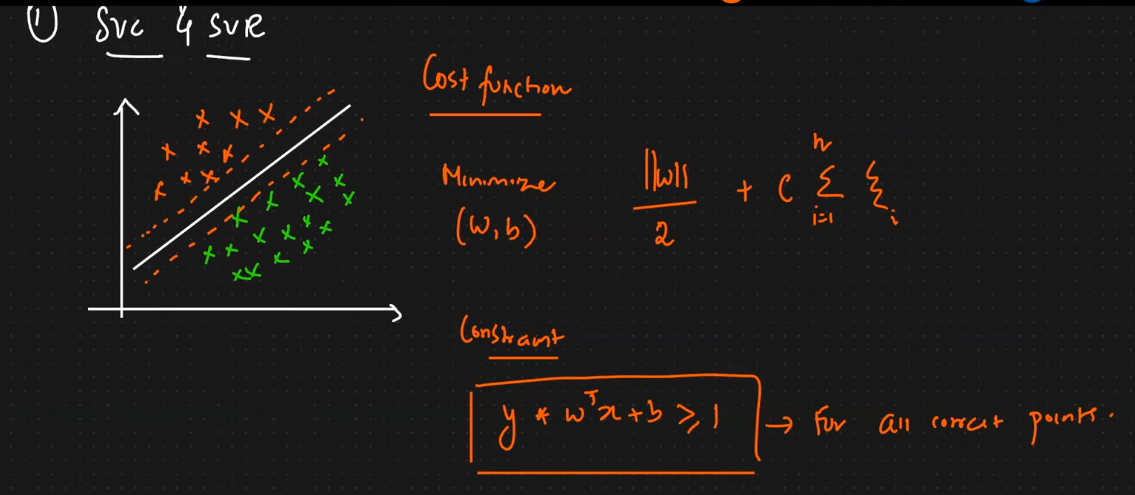

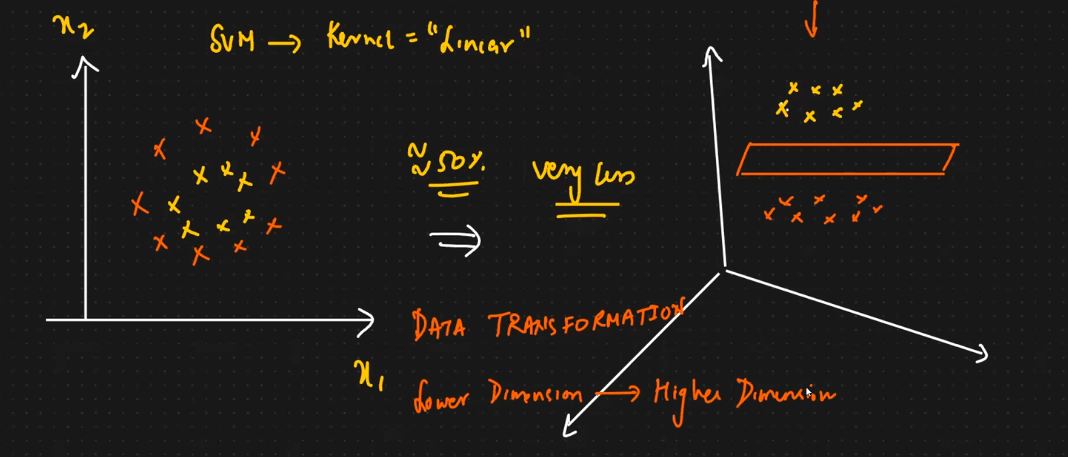

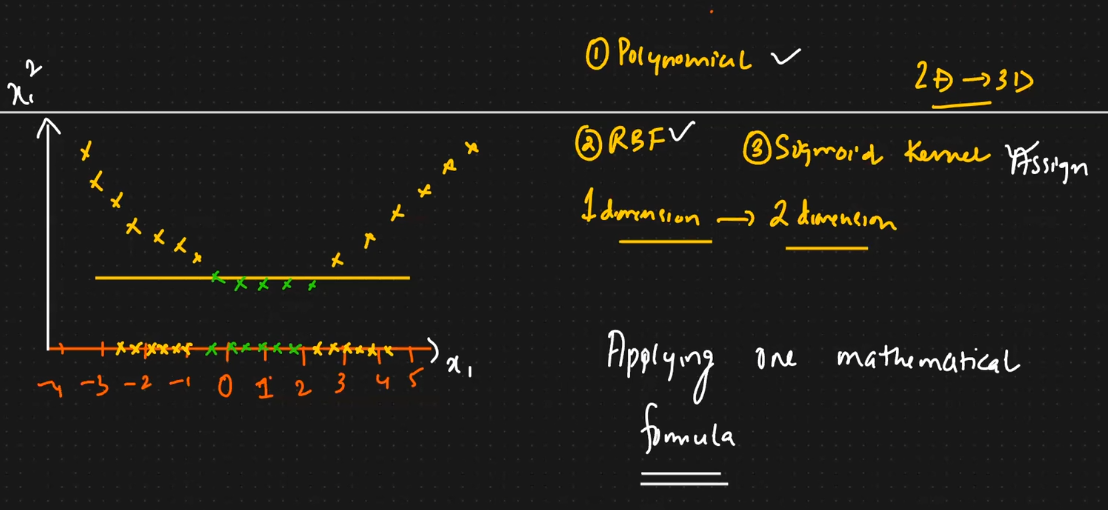


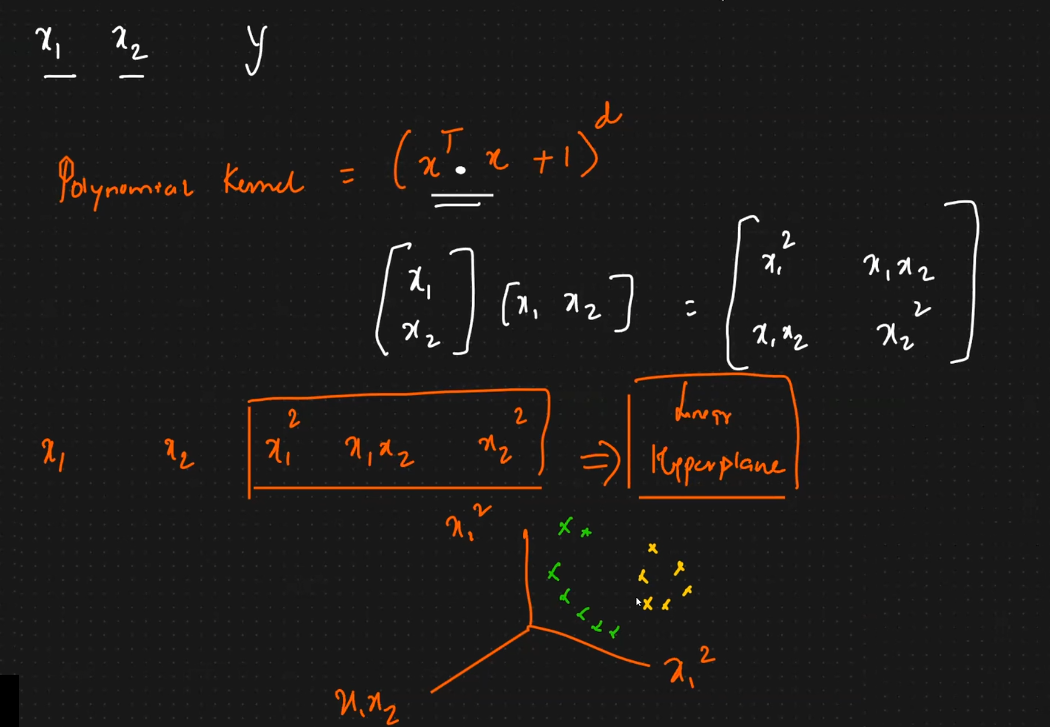

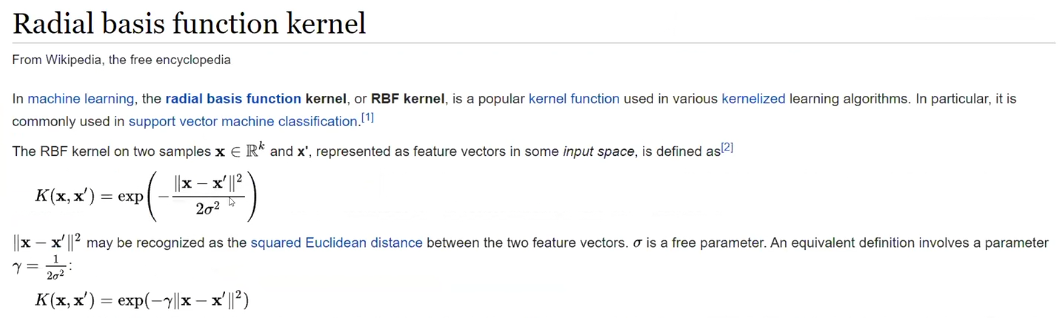

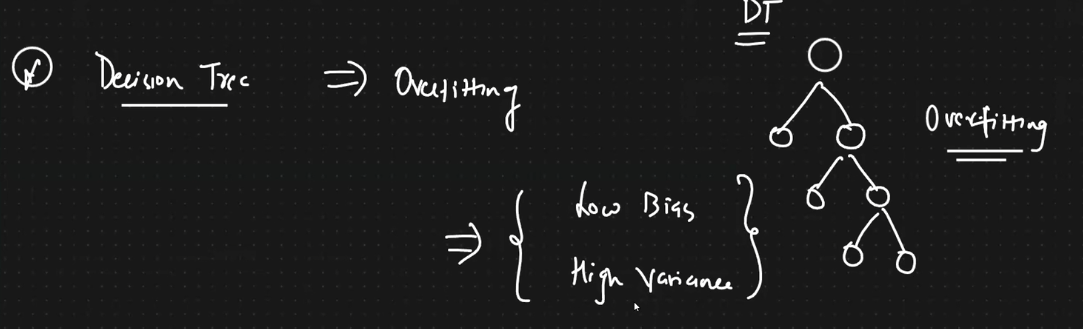

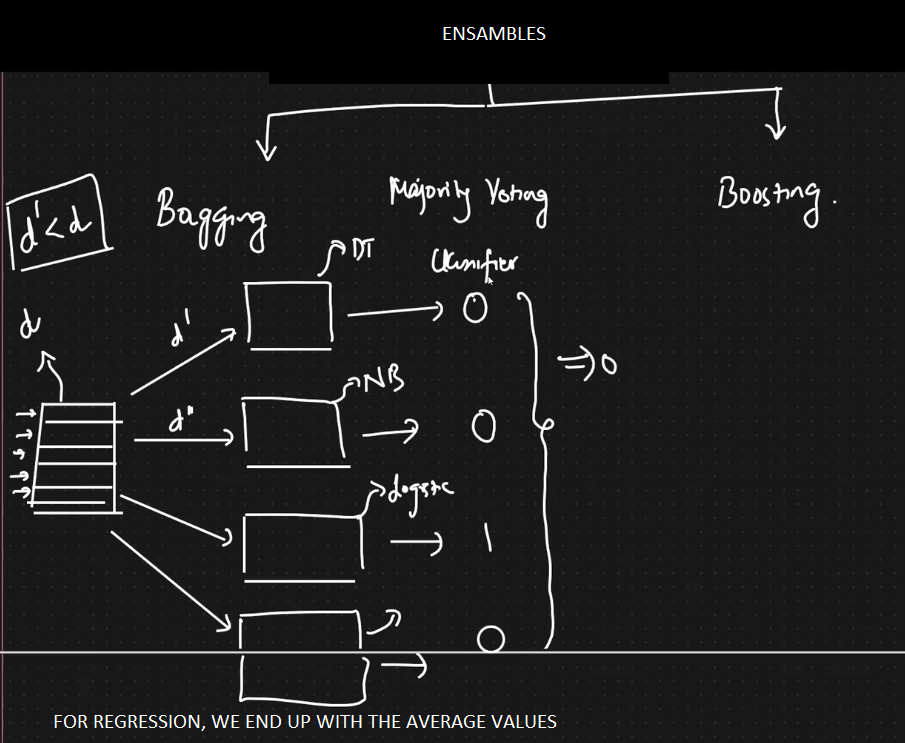

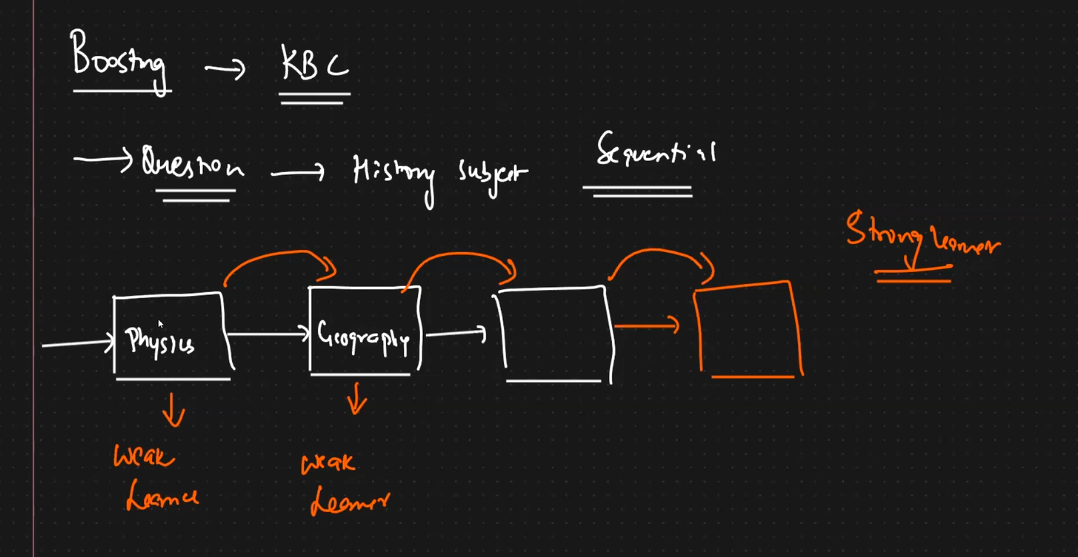

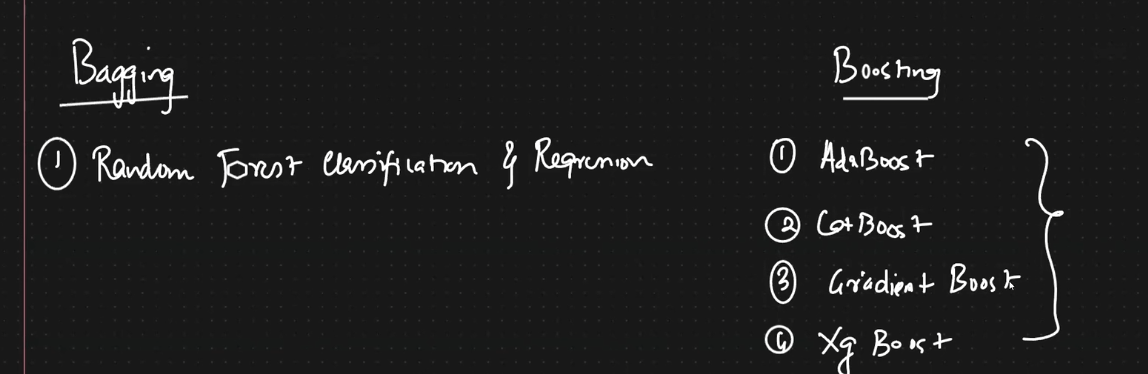

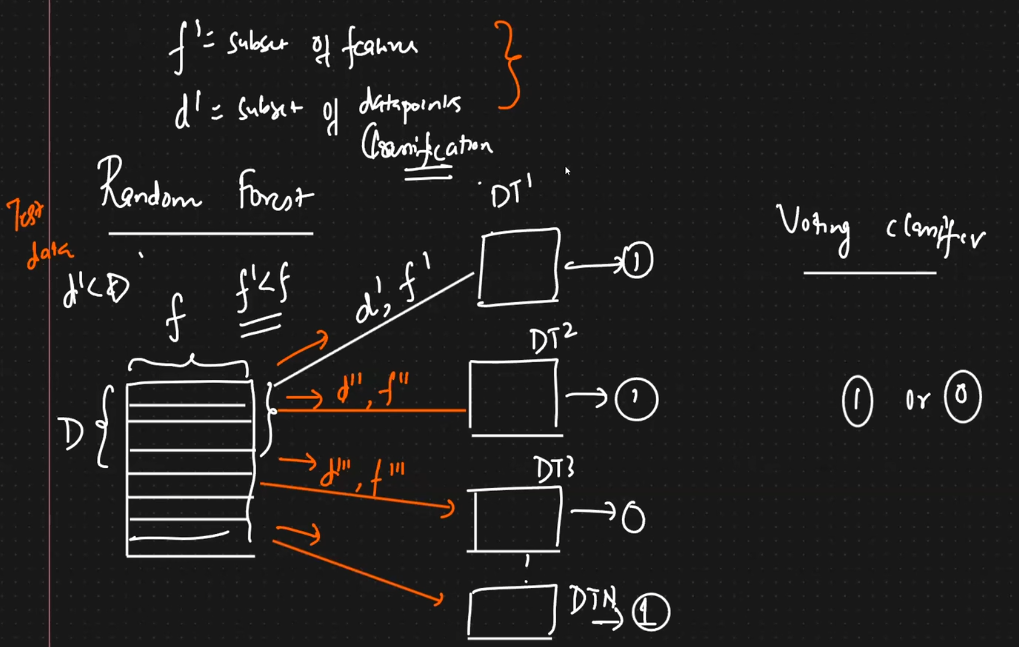

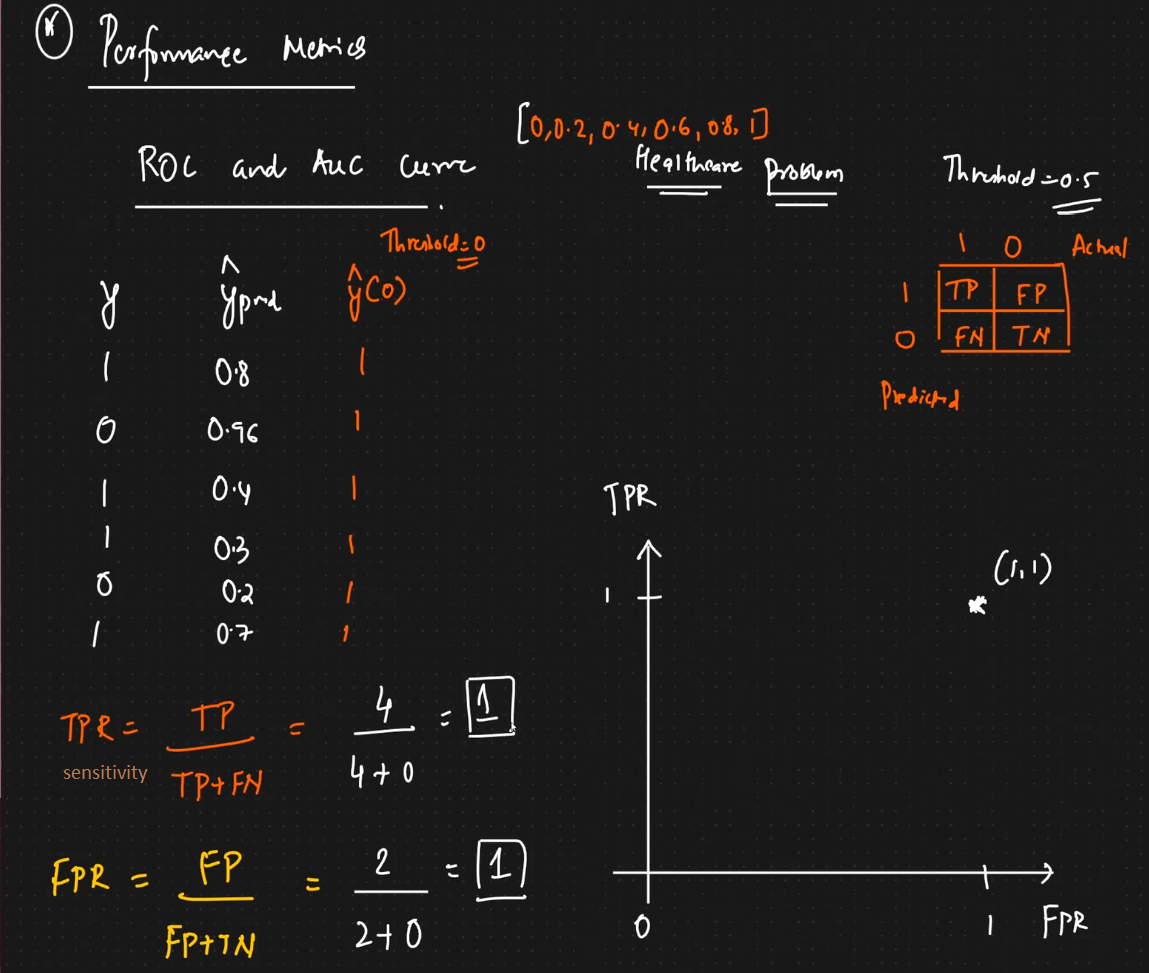

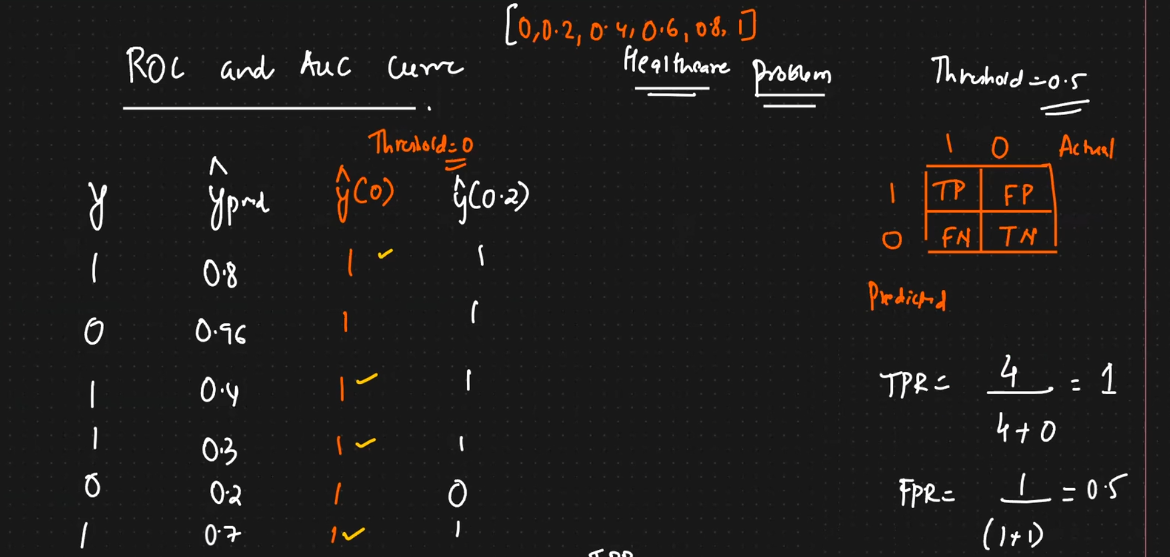

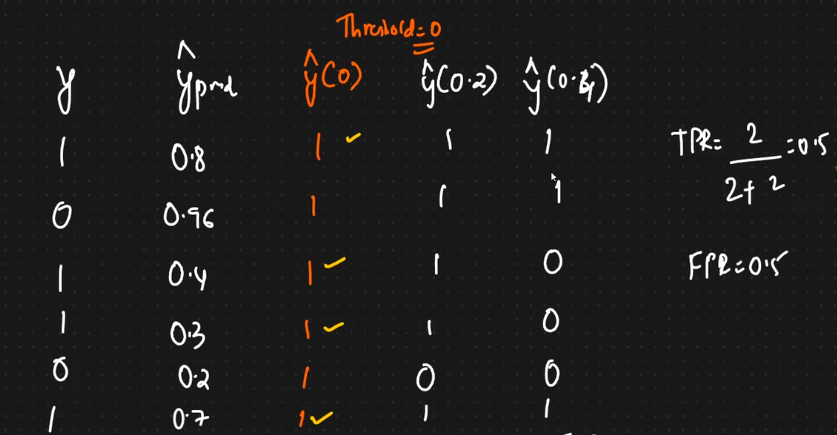

* ROC FUNCTION. TPR & FPR
* After calculating all the thresholds you get the full ROC curve
* AUC area under the curve, should be above the diagonal line joining 0,0 and 1,1
* the greater the AUC the better

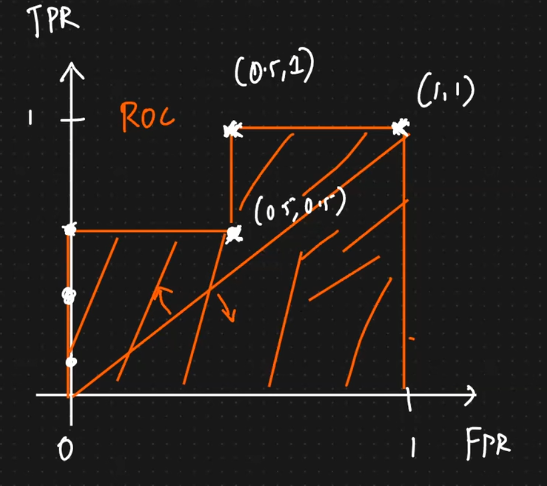

* to select the right threshould will depend on the task in hand, if you care more about TP then chose the higher TPR value that allows you to have the smaller FPR values

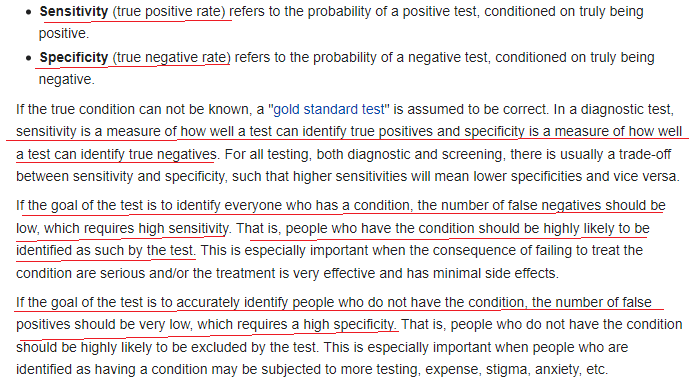

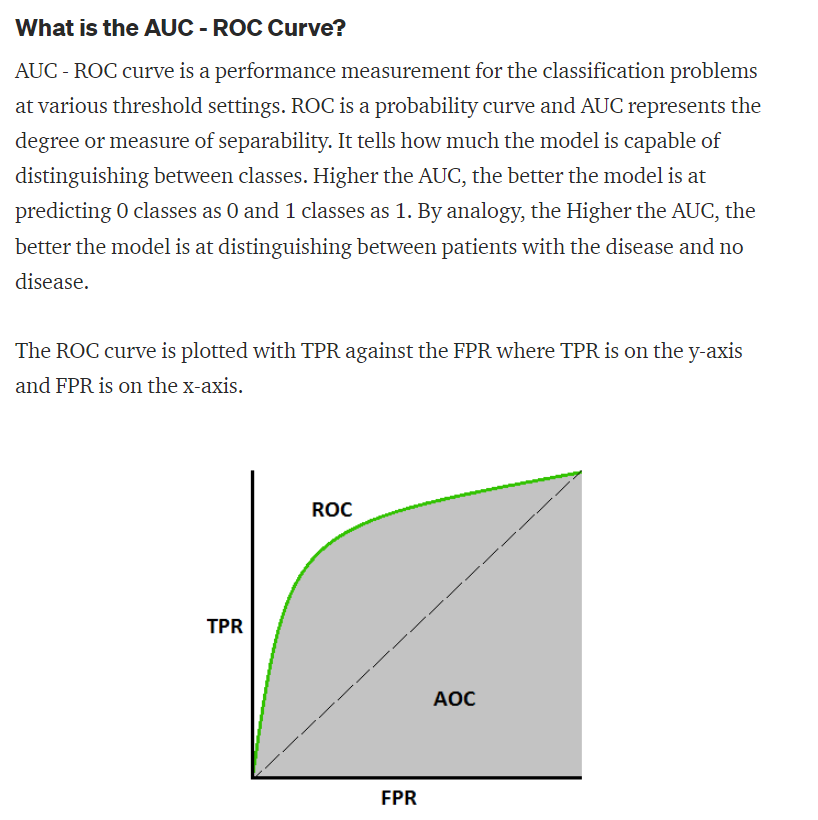

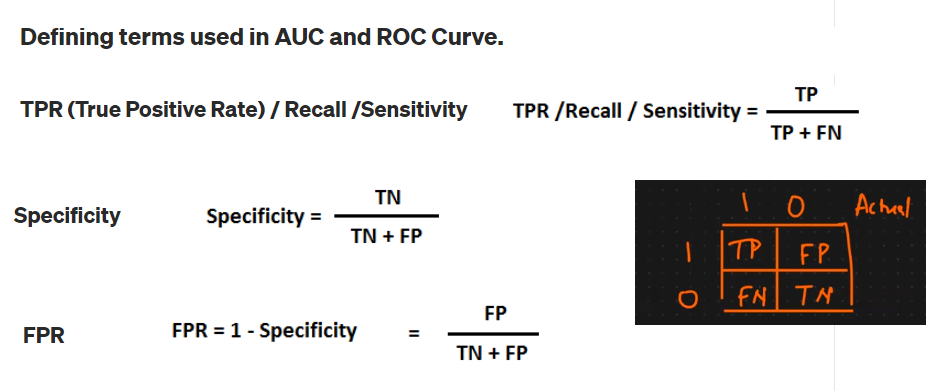

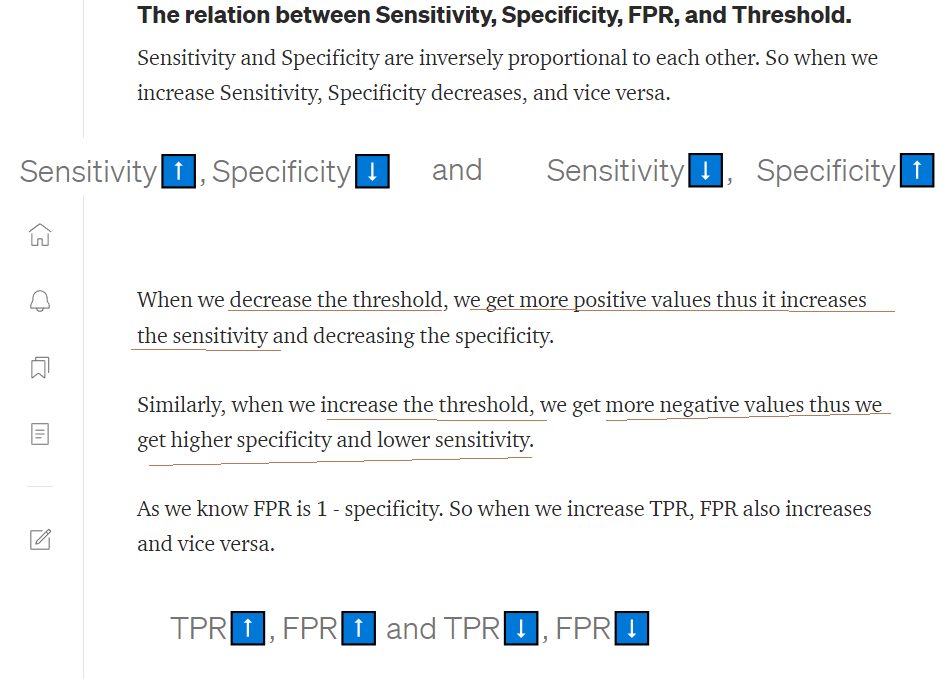

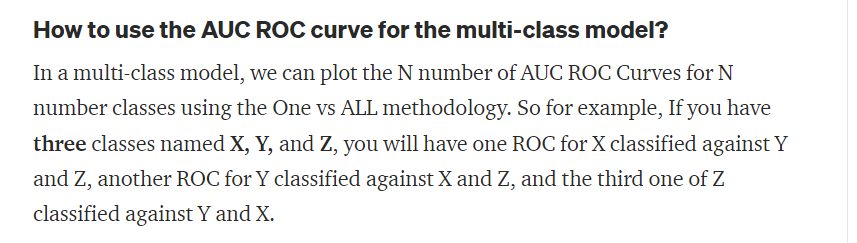

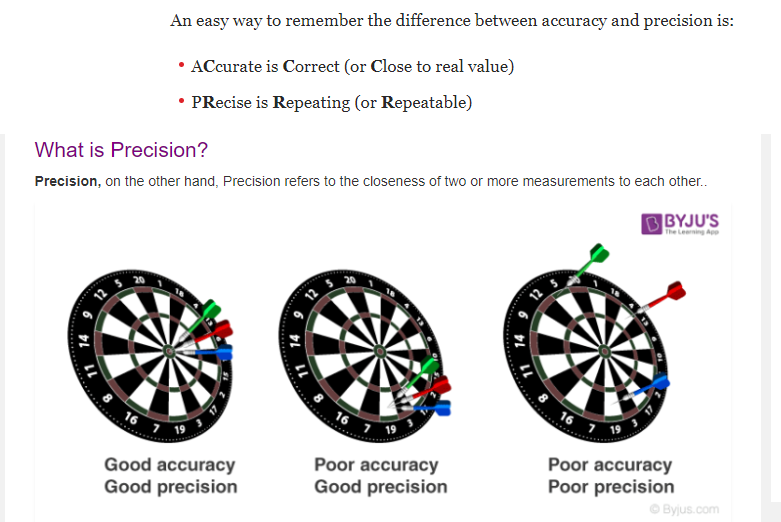

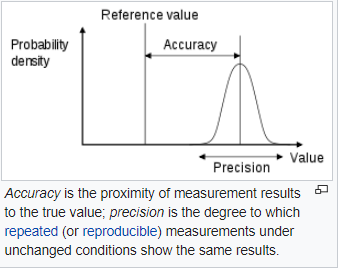

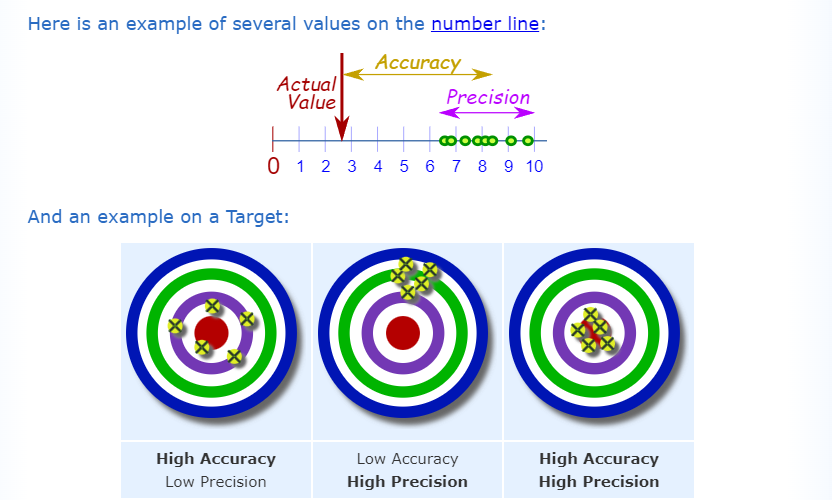

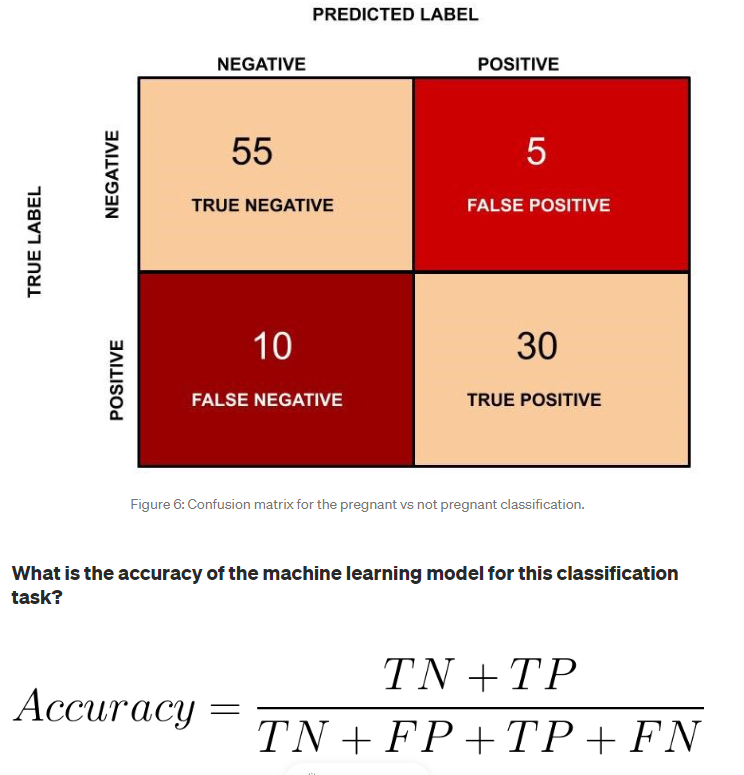

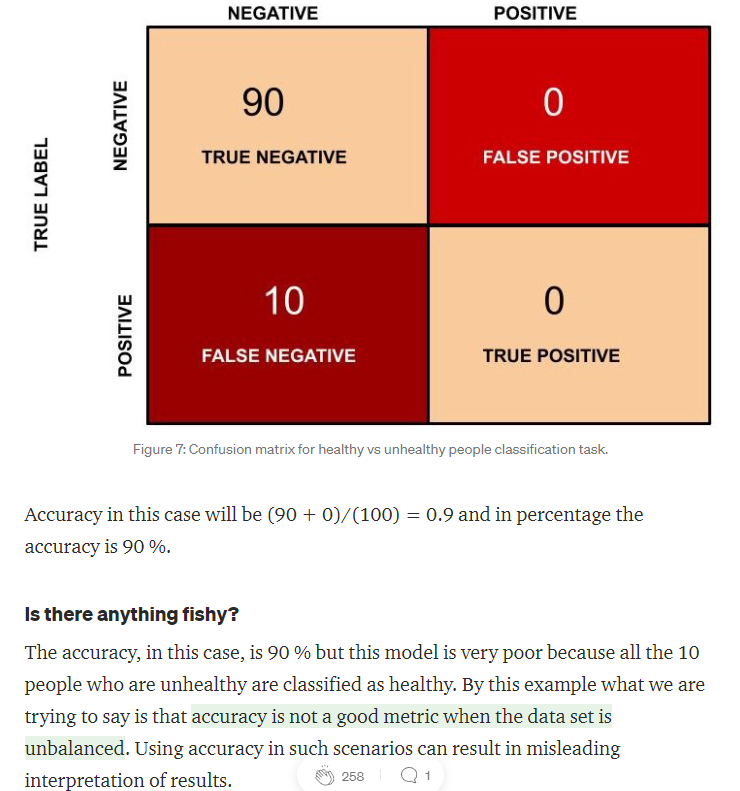

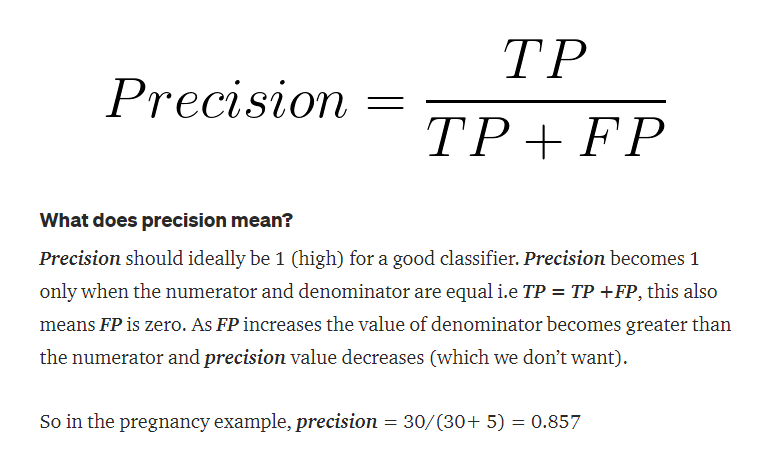

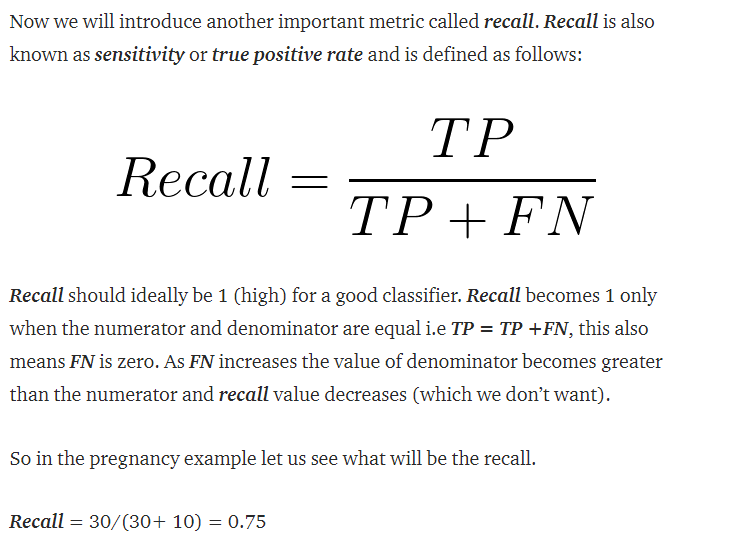

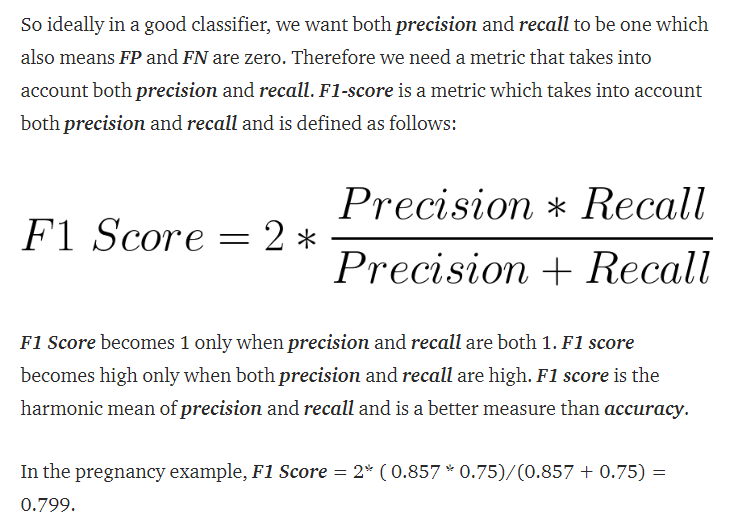

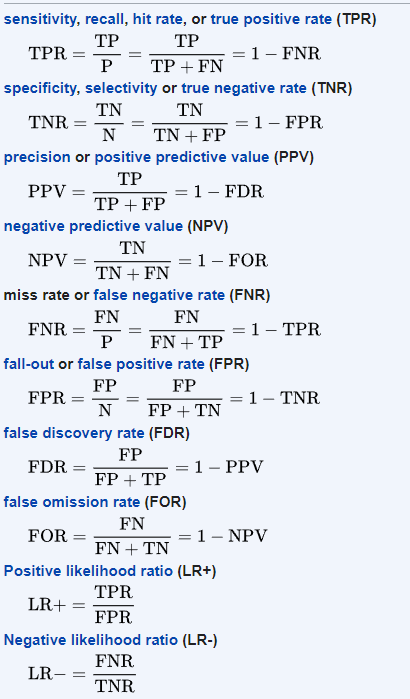

# implementation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\\lh_data\\ineuron\\airfoil_self_noise.dat", sep="\t", header=None )
df.columns = ["frequency","angle of attack","chord_length","free stream velocity","suction","Scaled sound"]
df

frequency  angle of attack  chord_length  free stream velocity  \
0           800              0.0        0.3048                  71.3   
1          1000              0.0        0.3048                  71.3   
2          1250              0.0        0.3048                  71.3   
3          1600              0.0        0.3048                  71.3   
4          2000              0.0        0.3048                  71.3   
...         ...              ...           ...                   ...   
1498       2500             15.6        0.1016                  39.6   
1499       3150             15.6        0.1016                  39.6   
1500       4000             15.6        0.1016                  39.6   
1501       5000             15.6        0.1016                  39.6   
1502       6300             15.6        0.1016                  39.6   

       suction  Scaled sound  
0     0.002663       126.201  
1     0.002663       125.201  
2     0.002663       125.951  
3     0.002663       127.591  
4     0.002663       127.461  
...        ...           ...  
1498  0.052849       110.264  
1499  0.052849       109.254  
1500  0.052849       106.604  
1501  0.052849       106.224  
1502  0.052849       104.204  

[1503 rows x 6 columns]

In [3]:
df.isnull().sum()

frequency               0
angle of attack         0
chord_length            0
free stream velocity    0
suction                 0
Scaled sound            0
dtype: int64

In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X.shape, y.shape

((1503, 5), (1503,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X,y,test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1052, 5), (1052,), (451, 5), (451,))

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
import matplotlib.pyplot as plt
X_train.corr()

frequency  angle of attack  chord_length  \
frequency              1.000000        -0.267292     -0.016264   
angle of attack       -0.267292         1.000000     -0.499550   
chord_length          -0.016264        -0.499550      1.000000   
free stream velocity   0.171176         0.043420     -0.000351   
suction               -0.220048         0.750054     -0.210742   

                      free stream velocity   suction  
frequency                         0.171176 -0.220048  
angle of attack                   0.043420  0.750054  
chord_length                     -0.000351 -0.210742  
free stream velocity              1.000000  0.004799  
suction                           0.004799  1.000000

In [8]:
X_train

frequency  angle of attack  chord_length  free stream velocity   suction
400        2000              7.3        0.2286                  71.3  0.010440
128         400              3.0        0.3048                  39.6  0.004957
1179       6300             17.4        0.0254                  55.5  0.016571
725         800              0.0        0.0508                  71.3  0.000740
1368        315              6.7        0.1016                  31.7  0.005929
...         ...              ...           ...                   ...       ...
1350       2500              6.7        0.1016                  71.3  0.004783
39         2000              0.0        0.3048                  39.6  0.003101
929        2500             15.4        0.0508                  31.7  0.028985
1413        500             12.3        0.1016                  71.3  0.033779
137        3150              3.0        0.3048                  39.6  0.004957

[1052 rows x 5 columns]

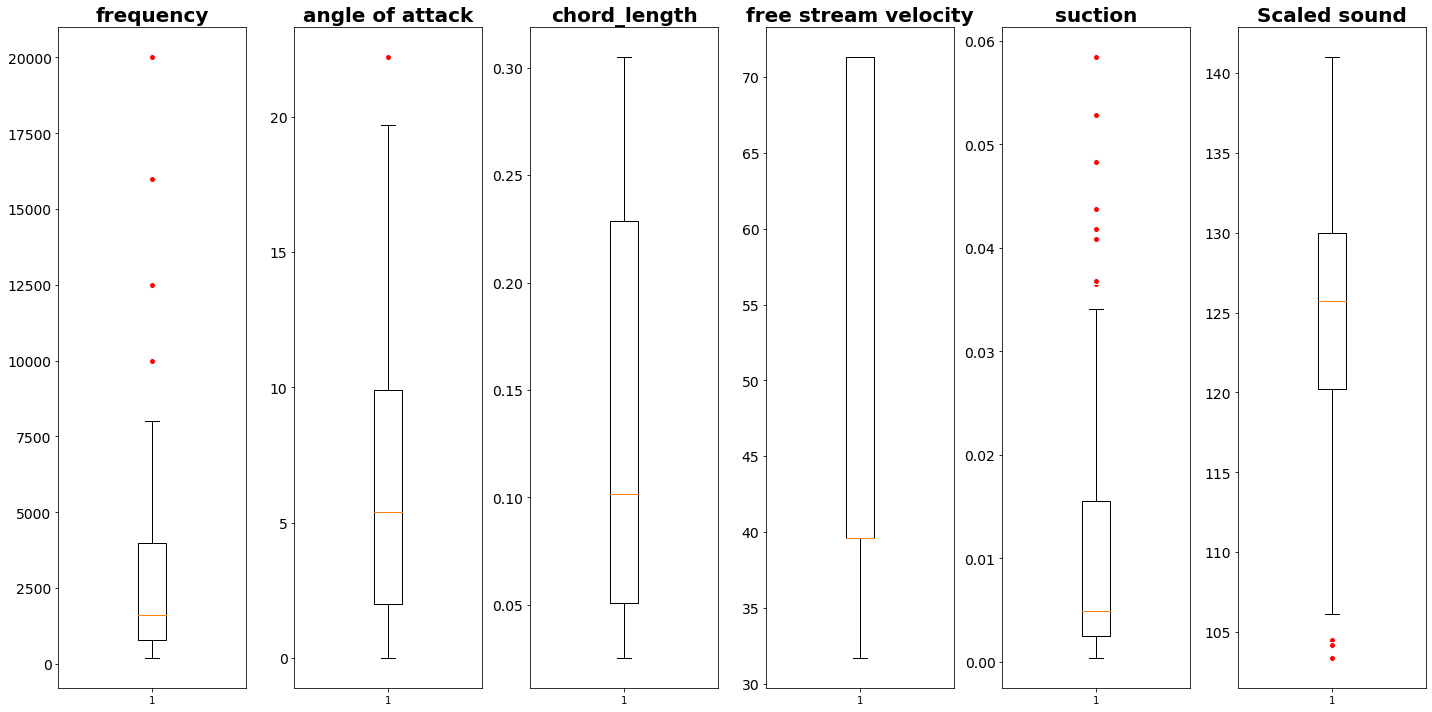

In [9]:
# creating subplot of each column with its own scale

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))


for i , ax in enumerate(axs.flat):

    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)
    
plt.tight_layout()
    

In [10]:
from sklearn.preprocessing import StandardScaler

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)   # scaled data

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((1052, 5), (1052,), (451, 5), (451,))

In [11]:
X_train

array([[-0.12260118,  1.79469448, -1.18862909, -0.72334483,  0.4625578 ],
       [-0.12260118, -0.0139114 , -0.37373954,  1.31293526, -0.48357437],
       [ 0.353359  , -1.14640293, -0.37373954, -0.72334483, -0.73609191],
       ...,
       [-0.71596486,  0.74671724, -0.91699924, -0.72334483,  0.29727381],
       [-0.81591649,  0.93264869, -0.37373954, -1.23080896,  2.33805337],
       [ 0.67066578,  1.00026012, -1.18862909,  1.31293526,  0.07918232]])

# Linear regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score 

In [13]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [14]:
#calculate R-squared of regression model
r_squared_train = regressor.score(X_train,y_train)
r_squared_test = regressor.score(X_test,y_test)   # R2 for test data

#view R-squared value
print(r_squared_train,r_squared_test)

0.5214416938715568 0.4982726587932884


In [15]:
X

frequency  angle of attack  chord_length  free stream velocity   suction
0           800              0.0        0.3048                  71.3  0.002663
1          1000              0.0        0.3048                  71.3  0.002663
2          1250              0.0        0.3048                  71.3  0.002663
3          1600              0.0        0.3048                  71.3  0.002663
4          2000              0.0        0.3048                  71.3  0.002663
...         ...              ...           ...                   ...       ...
1498       2500             15.6        0.1016                  39.6  0.052849
1499       3150             15.6        0.1016                  39.6  0.052849
1500       4000             15.6        0.1016                  39.6  0.052849
1501       5000             15.6        0.1016                  39.6  0.052849
1502       6300             15.6        0.1016                  39.6  0.052849

[1503 rows x 5 columns]

In [16]:
#Intercept and Coefficient
print("Intercept: ", regressor.intercept_)
print("Coefficients:")
list(zip(X, regressor.coef_))

Intercept:  124.93491746839203
Coefficients:


[('frequency', -4.010552719219715),
 ('angle of attack', -2.160921696432047),
 ('chord_length', -3.237018557260836),
 ('free stream velocity', 1.5566258800955277),
 ('suction', -2.0665517571236602)]

In [17]:
#Prediction of test set
y_pred= regressor.predict(X_test)

#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [124.06649005 119.46413909 120.33254103 129.60886761 129.78612472
 132.64423416 122.4349038  126.74983006 130.01045658 125.98273694
 132.48873564 113.83051731 130.13817923 132.56057082 123.65534464
 113.99243741 124.34984419 126.70187871 129.23000637 131.83506582
 125.76768033 125.00648272 116.41914989 129.86629416 124.21067831
 124.67311231 131.6322296  124.6043593  115.64678565 123.26378128
 125.22302256 123.89962071 125.51202054 118.6912124  121.72209401
 130.96423273 131.37300187 128.30505685 121.40529584 117.87341962
 126.42152289 128.89466472 126.40892509 123.45296426 123.11311866
 130.1672403  125.09652956 120.00622727 123.17401814 132.83265792
 128.71305692 117.79809953 123.48169003 122.52751265 126.70612854
 120.54580229 123.29728962 128.69414033 124.25737638 123.24008395
 125.43355297 131.05870029 126.77173379 131.40292322 120.05532215
 123.09095343 126.57946563 122.7444624  130.05626001 126.85292129
 129.0246526  131.7251903  126.44696252 118.6171770

In [18]:
#Actual value and the predicted value
regressor_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
regressor_diff.head()

Actual value  Predicted value
51         125.045       124.066490
1465       118.767       119.464139
184        120.233       120.332541
1000       137.047       129.608868
746        134.556       129.786125

In [19]:
r_squared_train = regressor.score(X_train,y_train)
r_squared_test = regressor.score(X_test,y_test)   # R2 for test data

In [21]:
#Model Evaluation
from sklearn import metrics
import numpy as np

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared train data: {:.2f}'.format(regressor.score(X_train,y_train)*100))
print('R squared test data: {:.2f}'.format(regressor.score(X_test,y_test)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared train data: 52.14
R squared test data: 49.83
Mean Absolute Error: 3.7761801748855004
Mean Square Error: 23.687858290026217
Root Mean Square Error: 4.867017391588632


# OLS

In [22]:
import statsmodels.api as sm

In [23]:
X_train

array([[-0.12260118,  1.79469448, -1.18862909, -0.72334483,  0.4625578 ],
       [-0.12260118, -0.0139114 , -0.37373954,  1.31293526, -0.48357437],
       [ 0.353359  , -1.14640293, -0.37373954, -0.72334483, -0.73609191],
       ...,
       [-0.71596486,  0.74671724, -0.91699924, -0.72334483,  0.29727381],
       [-0.81591649,  0.93264869, -0.37373954, -1.23080896,  2.33805337],
       [ 0.67066578,  1.00026012, -1.18862909,  1.31293526,  0.07918232]])

In [24]:
X_train = sm.add_constant(X_train)  # Adds an intercept term to the simple linear regression formula

In [25]:
X_train

array([[ 1.        , -0.12260118,  1.79469448, -1.18862909, -0.72334483,
         0.4625578 ],
       [ 1.        , -0.12260118, -0.0139114 , -0.37373954,  1.31293526,
        -0.48357437],
       [ 1.        ,  0.353359  , -1.14640293, -0.37373954, -0.72334483,
        -0.73609191],
       ...,
       [ 1.        , -0.71596486,  0.74671724, -0.91699924, -0.72334483,
         0.29727381],
       [ 1.        , -0.81591649,  0.93264869, -0.37373954, -1.23080896,
         2.33805337],
       [ 1.        ,  0.67066578,  1.00026012, -1.18862909,  1.31293526,
         0.07918232]])

In [26]:
lin_model = sm.OLS(y_train, X_train)
regr_results = lin_model.fit()
print(regr_results.summary())

                            OLS Regression Results                            
Dep. Variable:           Scaled sound   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     227.9
Date:                Sat, 04 Jun 2022   Prob (F-statistic):          1.38e-164
Time:                        22:54:08   Log-Likelihood:                -3138.0
No. Observations:                1052   AIC:                             6288.
Df Residuals:                    1046   BIC:                             6318.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        124.9349      0.148    844.960      0.0

In [27]:
regr_results.params

const    124.934917
x1        -4.010553
x2        -2.160922
x3        -3.237019
x4         1.556626
x5        -2.066552
dtype: float64

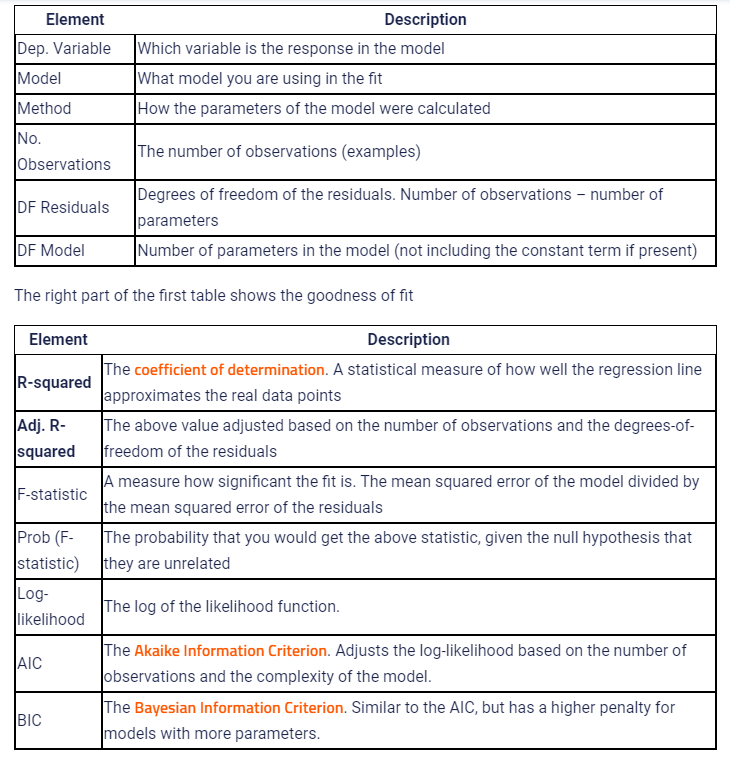

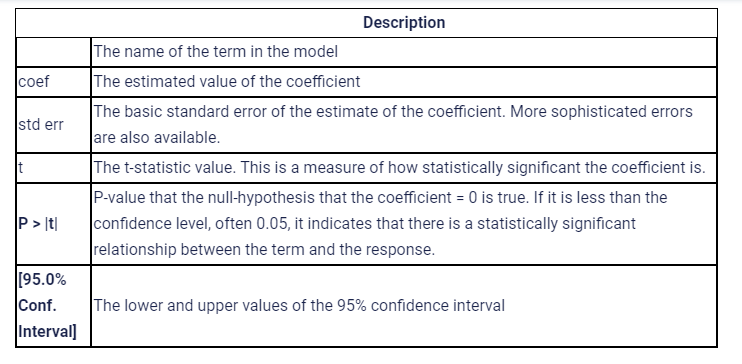

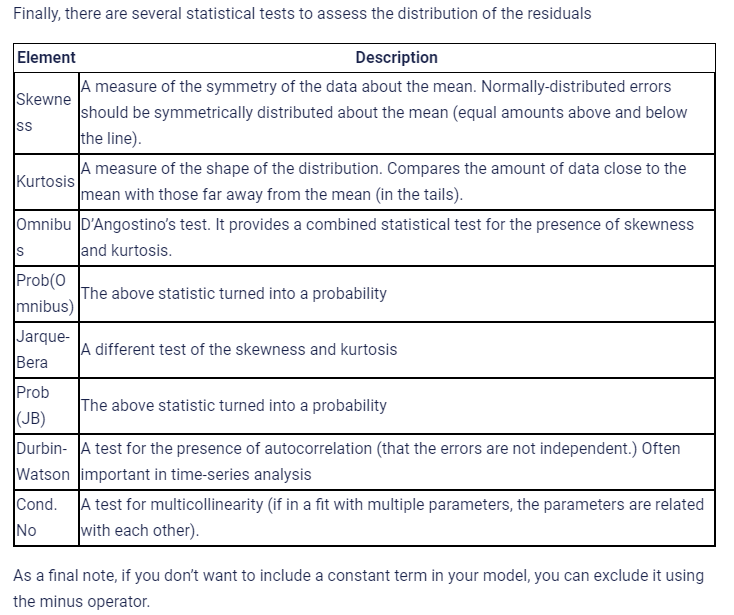

# SVR

In [28]:
df

frequency  angle of attack  chord_length  free stream velocity  \
0           800              0.0        0.3048                  71.3   
1          1000              0.0        0.3048                  71.3   
2          1250              0.0        0.3048                  71.3   
3          1600              0.0        0.3048                  71.3   
4          2000              0.0        0.3048                  71.3   
...         ...              ...           ...                   ...   
1498       2500             15.6        0.1016                  39.6   
1499       3150             15.6        0.1016                  39.6   
1500       4000             15.6        0.1016                  39.6   
1501       5000             15.6        0.1016                  39.6   
1502       6300             15.6        0.1016                  39.6   

       suction  Scaled sound  
0     0.002663       126.201  
1     0.002663       125.201  
2     0.002663       125.951  
3     0.002663       127.591  
4     0.002663       127.461  
...        ...           ...  
1498  0.052849       110.264  
1499  0.052849       109.254  
1500  0.052849       106.604  
1501  0.052849       106.224  
1502  0.052849       104.204  

[1503 rows x 6 columns]

In [29]:
from sklearn.preprocessing import StandardScaler

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [30]:
y

array([126.201, 125.201, 125.951, ..., 106.604, 106.224, 104.204])

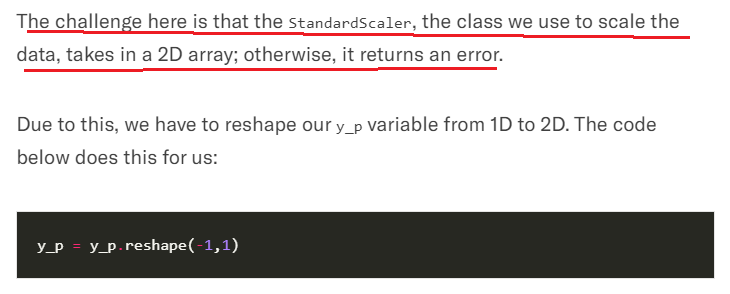

In [31]:
y = y.reshape(-1,1)
y

array([[126.201],
       [125.201],
       [125.951],
       ...,
       [106.604],
       [106.224],
       [104.204]])

In [32]:
stds_X = StandardScaler() 
stds_y = StandardScaler()

X_sc = stds_X.fit_transform(X)   # scaled data
y_sc = stds_y.fit_transform(y)   # scaled data


X_train, X_test, y_train, y_test = train_test_split(X_sc, y_sc, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((1052, 5), (1052, 1), (451, 5), (451, 1))

In [33]:
X_train

array([[-0.12260118,  1.79469448, -1.18862909, -0.72334483,  0.4625578 ],
       [-0.12260118, -0.0139114 , -0.37373954,  1.31293526, -0.48357437],
       [ 0.353359  , -1.14640293, -0.37373954, -0.72334483, -0.73609191],
       ...,
       [-0.71596486,  0.74671724, -0.91699924, -0.72334483,  0.29727381],
       [-0.81591649,  0.93264869, -0.37373954, -1.23080896,  2.33805337],
       [ 0.67066578,  1.00026012, -1.18862909,  1.31293526,  0.07918232]])

In [34]:
y_train

array([[-0.09888443],
       [ 0.96022481],
       [ 0.42994517],
       ...,
       [ 1.20267151],
       [-0.01724718],
       [ 0.60061488]])

In [35]:
# plt.scatter(X_sc, y_sc, color = 'red') # plotting the training set
# plt.title('Scatter Plot') # adding a tittle to our plot
# plt.xlabel('features') # adds a label to the x-axis
# plt.ylabel('Sound') # adds a label to the y-axis
# plt.show() # prints

Example:

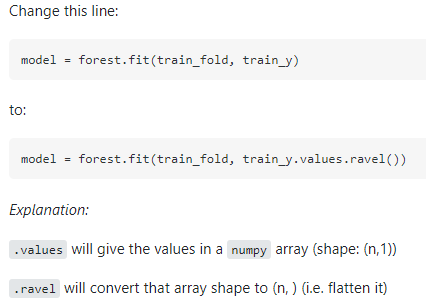

In [36]:
print(y_train, y_train.shape)

[[-0.09888443]
 [ 0.96022481]
 [ 0.42994517]
 ...
 [ 1.20267151]
 [-0.01724718]
 [ 0.60061488]] (1052, 1)


In [37]:
print(y_train.ravel(), y_train.ravel().shape)

[-0.09888443  0.96022481  0.42994517 ...  1.20267151 -0.01724718
  0.60061488] (1052,)


In [38]:
X_train

array([[-0.12260118,  1.79469448, -1.18862909, -0.72334483,  0.4625578 ],
       [-0.12260118, -0.0139114 , -0.37373954,  1.31293526, -0.48357437],
       [ 0.353359  , -1.14640293, -0.37373954, -0.72334483, -0.73609191],
       ...,
       [-0.71596486,  0.74671724, -0.91699924, -0.72334483,  0.29727381],
       [-0.81591649,  0.93264869, -0.37373954, -1.23080896,  2.33805337],
       [ 0.67066578,  1.00026012, -1.18862909,  1.31293526,  0.07918232]])

In [39]:
from sklearn.svm import SVR
from sklearn import metrics

# create the model object
regressor = SVR(kernel = 'rbf')

# fit the model on the data
regressor.fit(X_train, y_train.ravel())

# Predict
y_pred = regressor.predict(X_test)

#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared train data: {:.2f}'.format(regressor.score(X_train,y_train)*100))
print('R squared test data: {:.2f}'.format(regressor.score(X_test,y_test)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared train data: 78.82
R squared test data: 74.52
Mean Absolute Error: 0.3634882937269325
Mean Square Error: 0.2529155756484153
Root Mean Square Error: 0.5029071242768542


# export the best model

In [40]:
import pickle

pickle.dump(regressor, open("model_svr.pkl","wb"))           # output the model

model_svr_pickled = pickle.load(open("model_svr.pkl","rb"))  # load the model back

y_pred_loaded_model = model_svr_pickled.predict(X_test)      # use the loaded model to predict

rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_pred, y_pred_loaded_model))  # compare with previous result
rootMeanSqErr

0.0

In [42]:
X_test[51]


array([ 1.62258612, -0.89286005,  1.79929926,  1.31293526, -0.59125771])

In [45]:
model_svr_pickled.predict([X_test[51]])  # predicts single input

array([-1.27193384])

In [46]:
y_test[51]  # expected single output

array([-1.3723096])

# now to write a flast to deploy the model

#### C:\Users\rivil\PycharmProjects\ml_model1

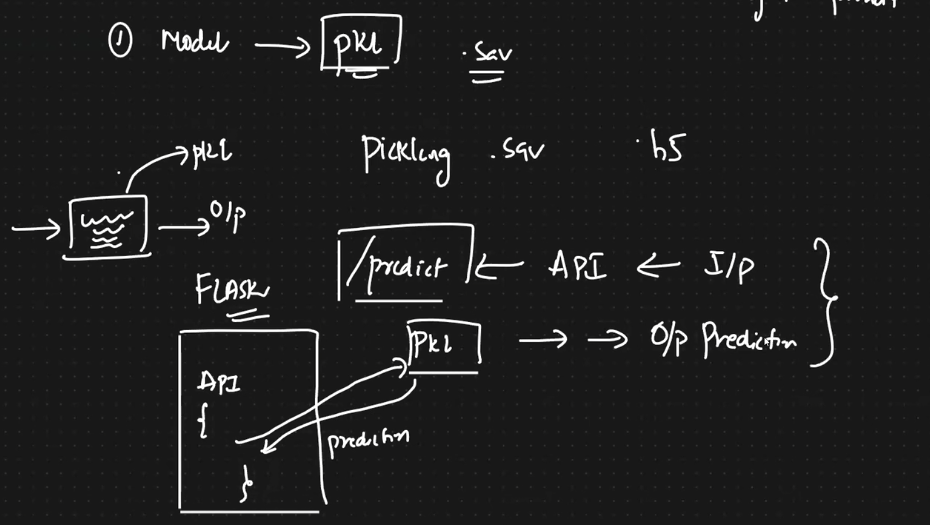

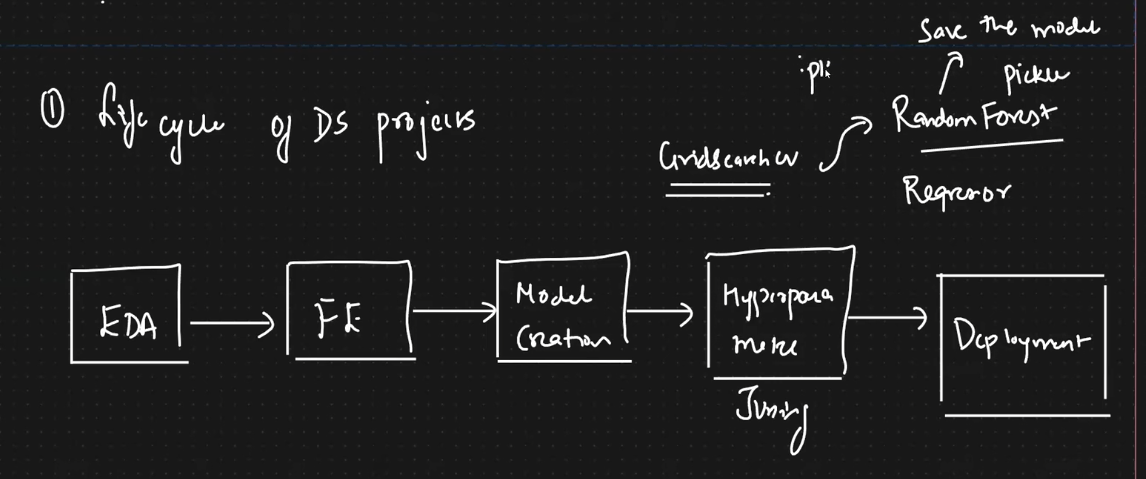

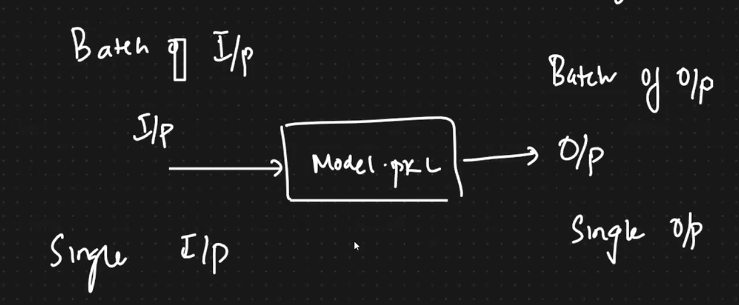

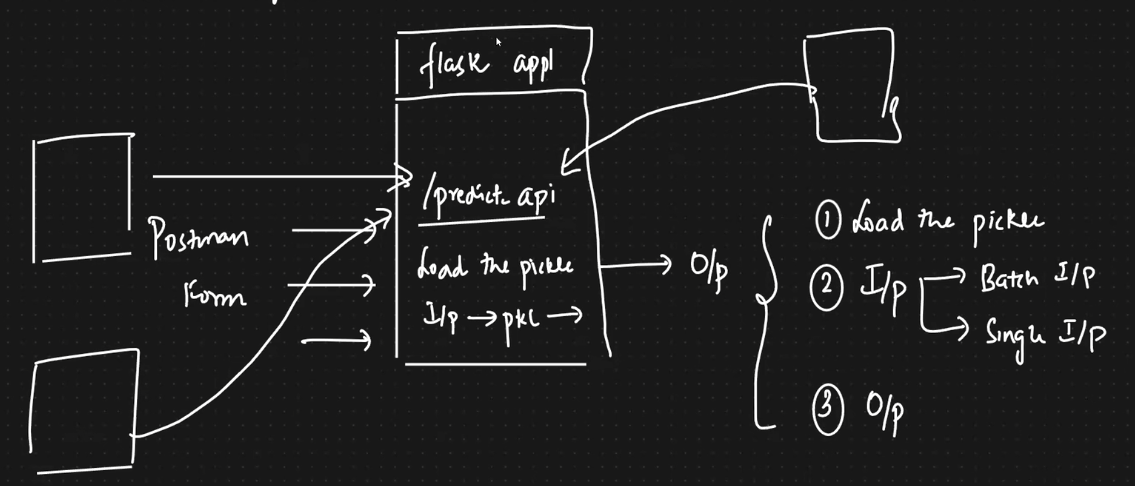